<a href="https://colab.research.google.com/github/A01793146/demodatabricks/blob/main/lety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palabras más frecuentes: [('texto', 2), ('español', 1), ('aquí', 1), ('usado', 1), ('demostrar', 1), ('funcionalidad', 1), ('código', 1)]
Bigramas más frecuentes: [(('texto', 'español'), 1), (('español', 'aquí'), 1), (('aquí', 'texto'), 1), (('texto', 'usado'), 1), (('usado', 'demostrar'), 1), (('demostrar', 'funcionalidad'), 1), (('funcionalidad', 'código'), 1)]


<ipython-input-3-22048ba1c39f>:39: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)


Clusters detectados: [0 0 0 0 0]


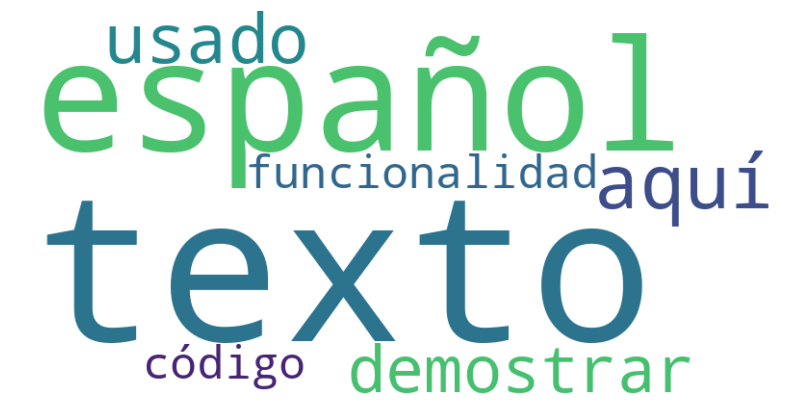

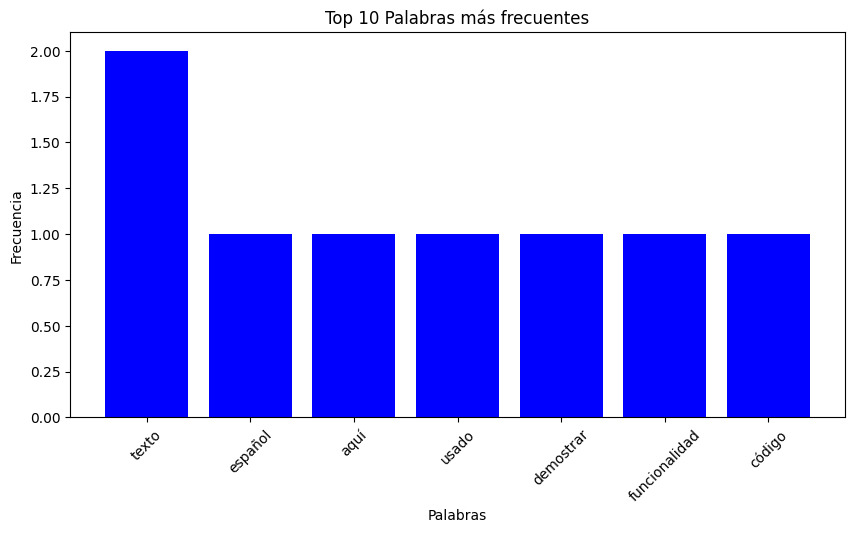

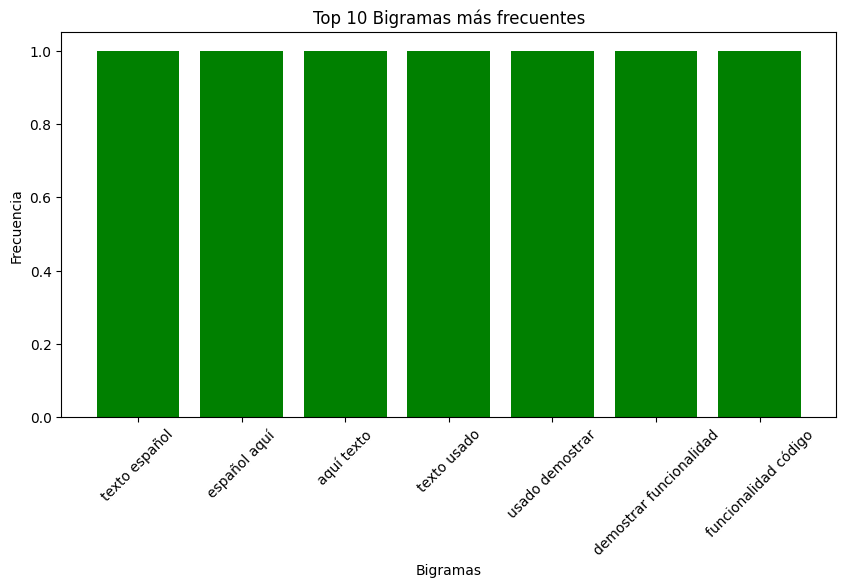

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Stop words en español (as a list)
stop_words = stopwords.words('spanish')

def preprocess_text(text):
    # Tokenizar el texto
    words = word_tokenize(text.lower())
    # Filtrar stop words y palabras no alfabéticas
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words

def get_most_frequent_words(words, n=10):
    # Obtener las palabras más frecuentes
    freq_dist = Counter(words)
    return freq_dist.most_common(n)

def get_most_frequent_bigrams(words, n=10):
    # Obtener bigramas
    bigrams = ngrams(words, 2)
    bigram_freq_dist = Counter(bigrams)
    return bigram_freq_dist.most_common(n)

def detect_clusters(texts, n_clusters=5):
    vectorizer = TfidfVectorizer(stop_words=stop_words)  # Now using a list for stop words
    X = vectorizer.fit_transform(texts)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    labels = kmeans.labels_
    return labels

def generate_word_cloud(words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def plot_most_frequent_words(words):
    word_labels, frequencies = zip(*words)
    plt.figure(figsize=(10, 5))
    plt.bar(word_labels, frequencies, color='blue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Palabras más frecuentes')
    plt.xticks(rotation=45)
    plt.show()

def plot_most_frequent_bigrams(bigrams):
    bigram_labels = [' '.join(bigram[0]) for bigram in bigrams]
    frequencies = [bigram[1] for bigram in bigrams]
    plt.figure(figsize=(10, 5))
    plt.bar(bigram_labels, frequencies, color='green')
    plt.xlabel('Bigramas')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Bigramas más frecuentes')
    plt.xticks(rotation=45)
    plt.show()

# Texto de ejemplo
text = """Tu texto en español aquí. Este texto será usado para demostrar la funcionalidad del código."""

# Preprocesar el texto
words = preprocess_text(text)

# Obtener las palabras más frecuentes
most_frequent_words = get_most_frequent_words(words)
print("Palabras más frecuentes:", most_frequent_words)

# Obtener los bigramas más frecuentes
most_frequent_bigrams = get_most_frequent_bigrams(words)
print("Bigramas más frecuentes:", most_frequent_bigrams)

# Detectar clusters en una lista de textos (en este caso, usando una lista con el mismo texto repetido)
texts = [text] * 5  # Ejemplo con 5 textos idénticos
clusters = detect_clusters(texts)
print("Clusters detectados:", clusters)

# Generar una nube de palabras
generate_word_cloud(words)

# Graficar las palabras más frecuentes
plot_most_frequent_words(most_frequent_words)

# Graficar los bigramas más frecuentes
plot_most_frequent_bigrams(most_frequent_bigrams)
